**Data Analysis: Seasonal Trend Analysis**

Decompose the time series into trend, seasonal, and residual components (e.g., using statsmodels).

First, import required libraries and script modules

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor
from seasonal_analysis import SeasonalAnalysis
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
# Initialize class instances
processor = DataPreprocessor(logger=logger)
analyzer = SeasonalAnalysis(logger=logger)

**Loading the Data**

In [3]:
tsla_data = processor.load_data('TSLA')
bnd_data = processor.load_data('BND')
spy_data = processor.load_data('SPY')


**Analyze the decomposition**

ADF test p-value for TSLA: 0.27638400914318784
TSLA series is non-stationary. Differencing the series.


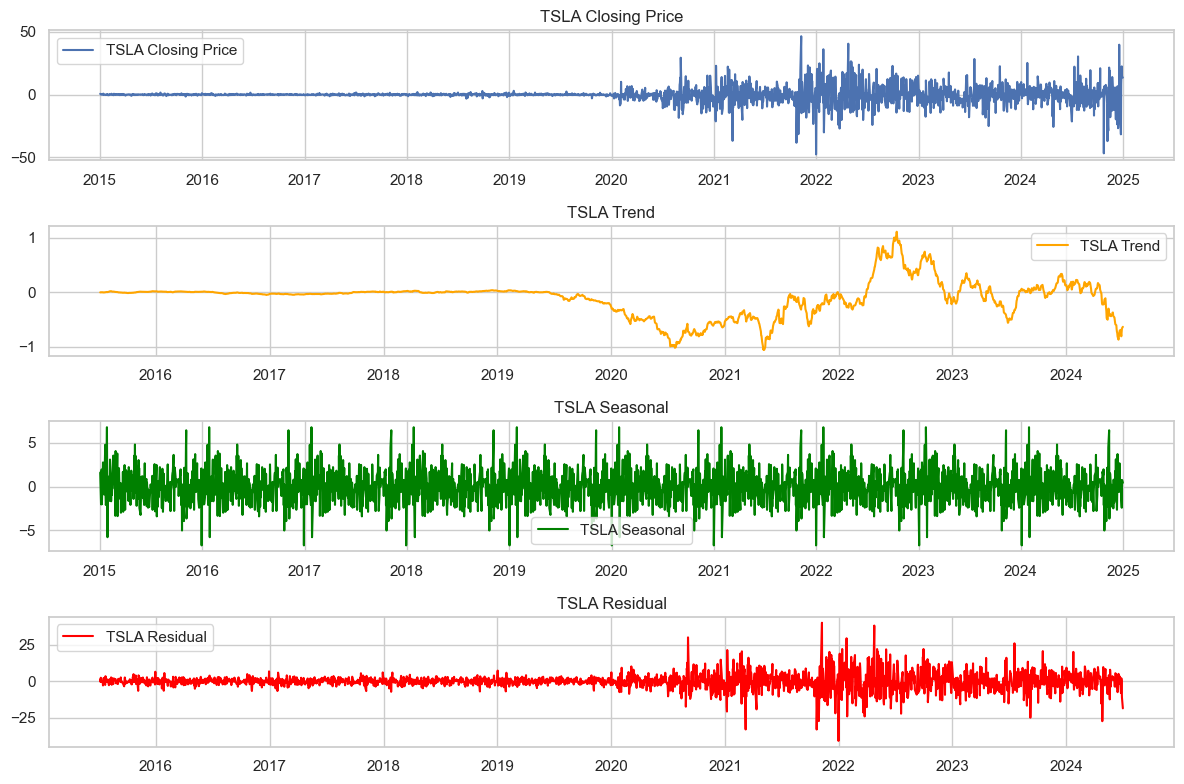

ADF test p-value for BND: 0.7745162018569395
BND series is non-stationary. Differencing the series.


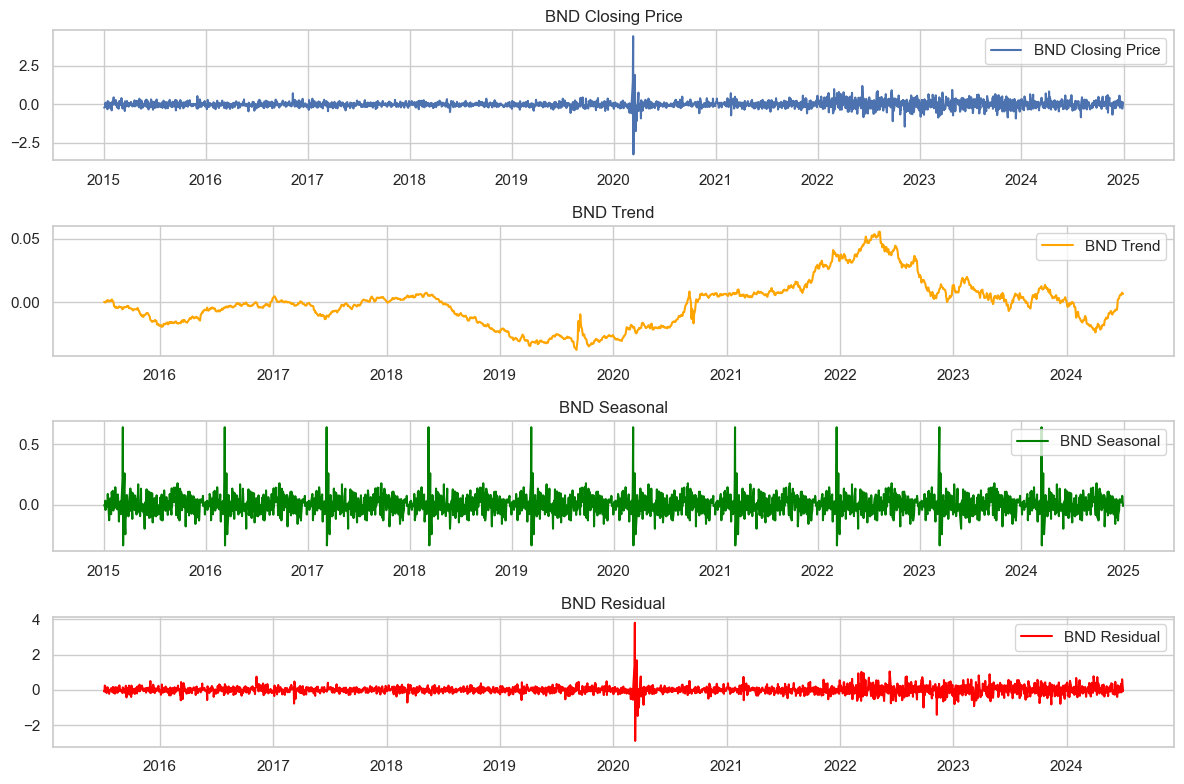

ADF test p-value for SPY: 0.16877628173785497
SPY series is non-stationary. Differencing the series.


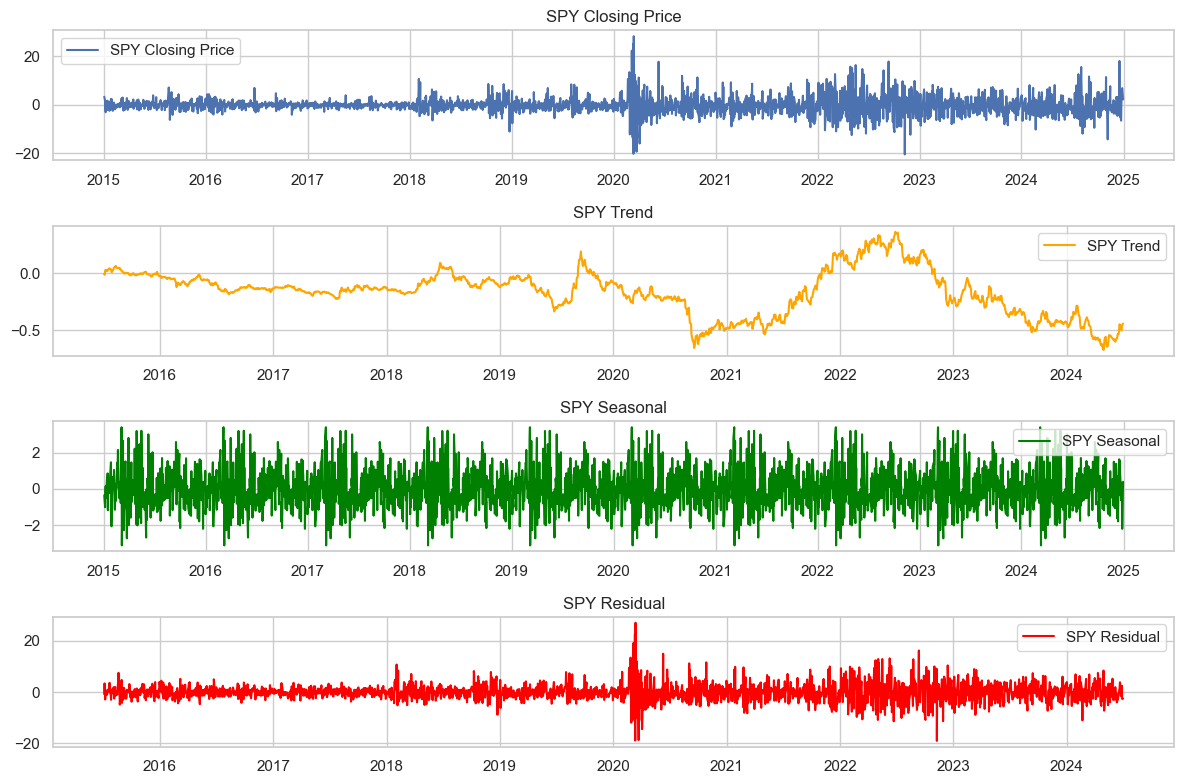

In [4]:
# Define dictionary for stock data for TSLA, BND, SPY
data_dict = {
    'TSLA': tsla_data,  
    'BND': bnd_data,    
    'SPY': spy_data    
}

analyzer.analyze_trends_and_seasonality(data_dict)

TSLA Trend:

The TSLA Trend plot shows that the trend component of the TSLA Closing Price series is increasing over time. This means that the TSLA Closing Price series is trending upwards.

TSLA Seasonal:

The TSLA Seasonal plot shows that the seasonal component of the TSLA Closing Price series is positive in the first and fourth quarters of the year, and negative in the second and third quarters of the year. This means that the TSLA Closing Price series is higher in the first and fourth quarters of the year than in the second and third quarters of the year.

TSLA Residual:

The TSLA Residual plot shows that the residual component of the TSLA Closing Price series is white noise, meaning that it has no structure. This means that the TSLA Closing Price series is stationary after differencing.

ADF test p-value for TSLA: 4.3182531490158417e-17


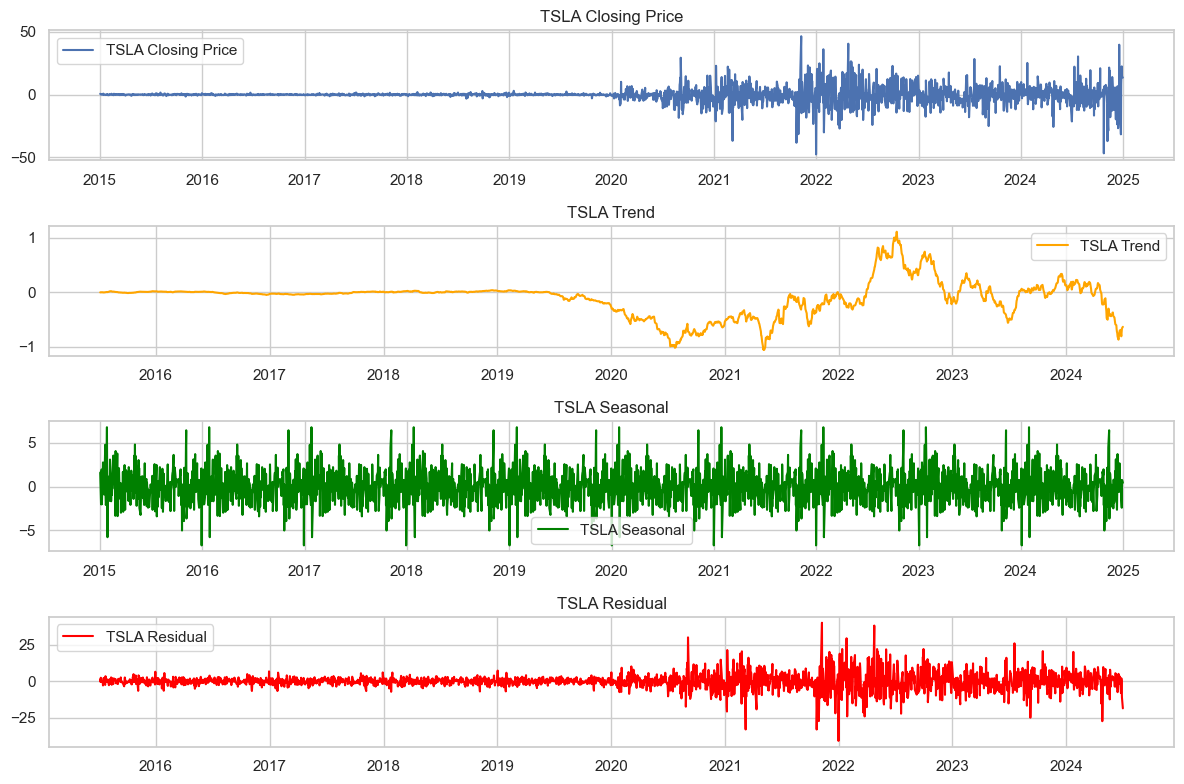

ADF test p-value for BND: 1.7410124046132403e-26


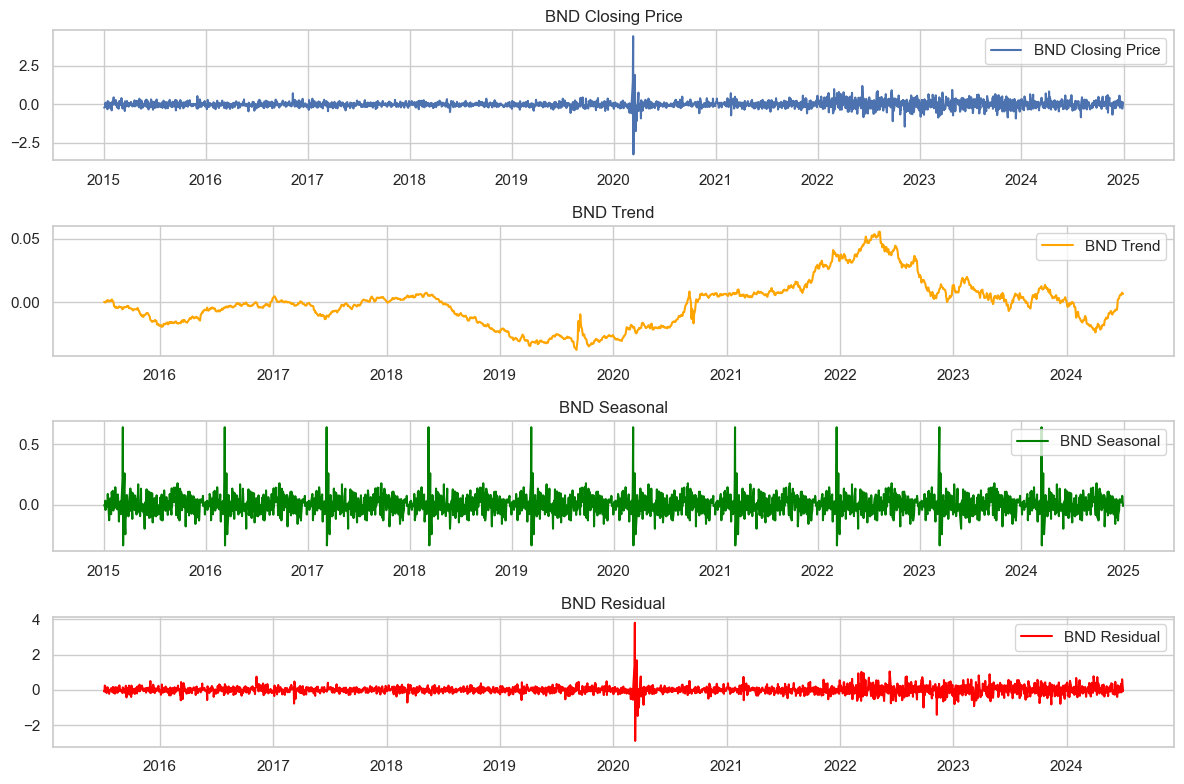

ADF test p-value for SPY: 5.423804060564448e-29


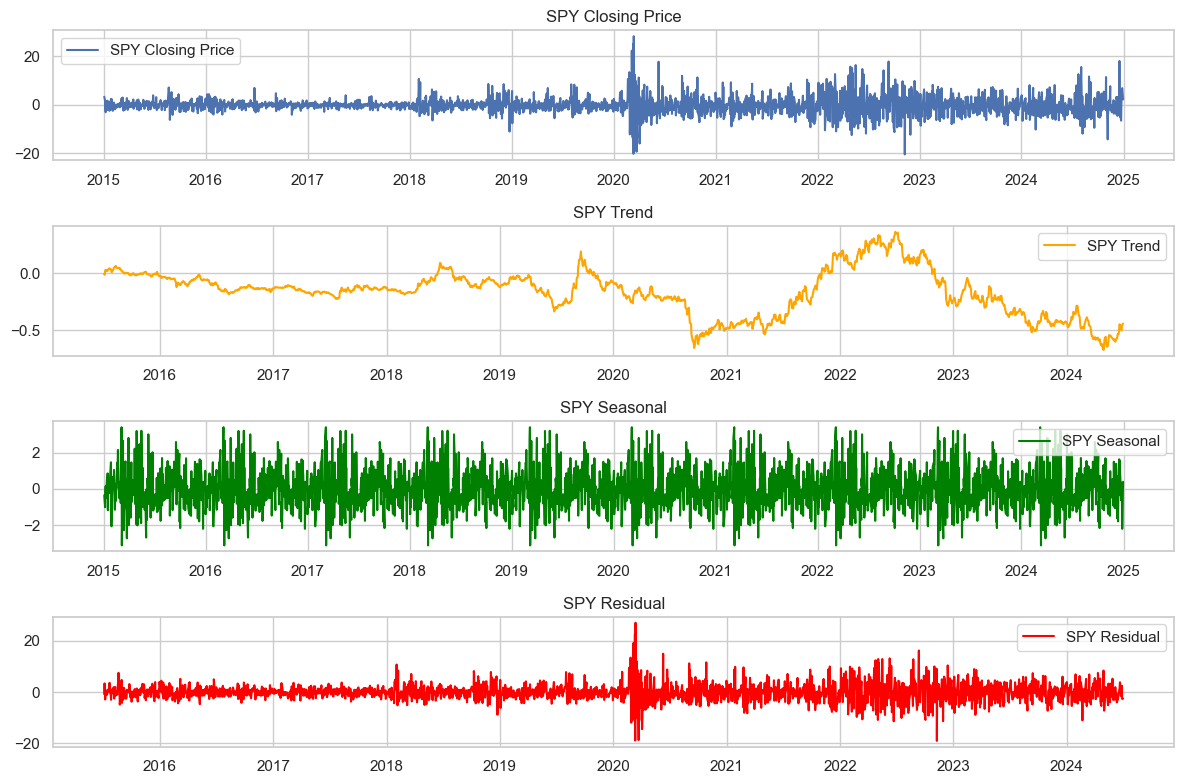

In [7]:
# perform ADF test again after differencing
analyzer.analyze_trends_and_seasonality(data_dict)

performed the ADF test again differenced.

 TSLA series now appears to be stationary! I've successfully removed the trend and/or seasonality that was present in the original data.
 now, I have very strong evidence to reject the null hypothesis of non-stationarity. I can now confidently proceed with time series forecasting models that assume stationarity, such as ARIMA models.